# Lab 2 : Linear Classification, Logistic Regression, SVM, PCA, Decision Tree

---


Total Points: **90**

Tentative Weightage : **9%**

Submission Deadline :  **$20^{th}$ March 2023 , 10:00 AM** (4 weeks)

Submit a separate report to mention any observations asked in the corresponding questions. Without these observations, no points will be provided for the corresponding question.
---



General Instructions:

---



1. You have to do this lab individually
2. You may use **seaborn, matplotlib, pandas, numpy, csv**
3. All the code should be submitted in the form of a single Jupyter notebook itself.
4. Points for each sub-section are mentioned in the appropriate question.
5. You can use Google colab to run a jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92) (https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/). You can also run it in your local anaconda jupyter notebook.
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations (report pdf) should be made part of the assignment.
7. **Code Readability** is very important. Modularize your code by making use of classes, functions that can be flexibly reused wherever necessary. Also use self explanatory variable names and add comments to describe your approach wherever necessary. You may add additional code or text blocks as necessary.
8. You are expected to submit your **observations** (preferably in a separate pdf file) and not just an error free code.
9. Students are expected to follow the **honor code** of the class.
10. The deadline is strict and any assignment submitted later will not
be consider for evaluation unless you take prior permission (at least 4 days before the submission deadline).
11. The marks will be given on the basis of quality of code, use of innovative data structures, scalability, correctness, and completeness of the reported observation.
12. In case of any queries regarding Lab 2, please mail the TAs (emails are provided on the google classroom).

**Best Wishes**


**TASK 1**: Classification                                     **(27 Marks)**

Indian Institute of Technology Ropar is planning to start machine learning based shortlisting criteria for Ph.D admissions. To analyze this problem let us start with a small user friendly dataset given in filename - 'classification_data1.txt'. The dataset contains performance in two entrance exams namely GATE and UGC-NET. With respect to this dataset, implement/report following:

1. Plot the dataset using different colors for the two classes. (2 Marks)

2. Implement the least square method for classification and plot the decision boundary. Clearly describe your results/observations in report. Is the decision boundary able to classify the points correctly? (4+3+3 Marks)

3. Usually, machine learning models, while training involves certain randomness. One example is splitting our data set into train and test sets. 
Each of you might generate entirely different train and test instances. We usually fix the seed value before executing our code to handle such issues. These seed values are used in generating random numbers. We run our code over different seed values to avoid uncertainities over selecting different train and test instances. The overall accuracy (or loss) results are reported as mean and standard deviation over these independent runs. Let's learn this idea via the following:

 3a) Implement a logistic regressor using the gradient descent method. 
Train the model on $80\%$ of a randomly divided dataset with a fixed learning rate $\beta$. Report the find the training and testing accuracy over $10$ independent runs. (5 Marks)

 3b) Repeat the previous experiment with different learning rates $\beta$ (of your choice) and plot the training, testing accuracies over $10$ independent runs for each $\beta$ value. (3 + 3 Marks)

 3c) Plot the classifier and decision boundary for the best regressor. Does the performance improve in comparison to least square method? (4 Marks)


**NOTE:** You can take seed values to be 0,100,200,300,$\ldots$,1000. (You can take any other values as well. Fix seedvalue from both numpy and random package).

Write your code by creating cells below.


In [430]:
#Imports
import random
import matplotlib.pyplot as plt
import numpy as np
random.seed(503)

In [431]:
''' Class to store the dataset '''
class dataSet:
    def __init__(self, fileName, labels):
        self.X = []
        self.Y = []
        dataFile = open(fileName, 'r')
        for line in dataFile:
            data = line.split(',')
            self.X.append((float(data[0]), float(data[1])))
            self.Y.append(int(data[2]))
        dataFile.close()
        self.labels = labels
        self.n = len(self.X)
    
    def __len__(self):
        return self.n
    
    def __getitem__(self, i):
        return self.X[i],self.Y[i]
    
    def __iter__(self):
        self.curIndex = 0
        return self
    
    def __next__(self):
        if self.curIndex >= self.n:
            raise StopIteration
        else:
            self.curIndex += 1
            return self.X[self.curIndex-1], self.Y[self.curIndex-1]
    

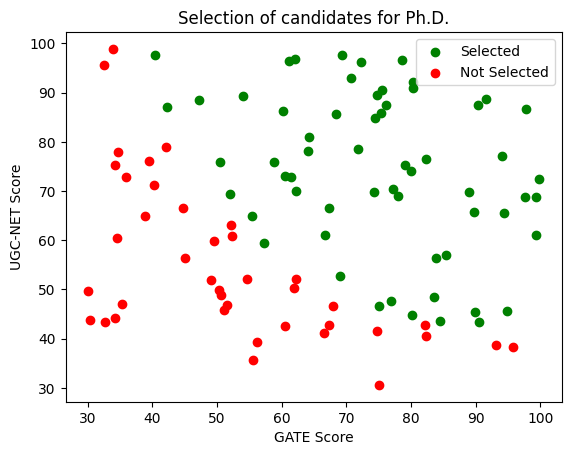

In [432]:
'''Plotting the dataset'''

data = dataSet('classification_data1.txt', ['GATE', 'UGC-NET','Success'])
success = []
failure = []
for x,y in data:
    if y == 1:
        success.append(x)
    else:
        failure.append(x)
plt.scatter([x[0] for x in success], [x[1] for x in success], c='g', label='Selected')
plt.scatter([x[0] for x in failure], [x[1] for x in failure], c='r', label='Not Selected')
plt.xlabel('GATE Score')
plt.ylabel('UGC-NET Score')
plt.title('Selection of candidates for Ph.D.')
plt.legend()
plt.show()


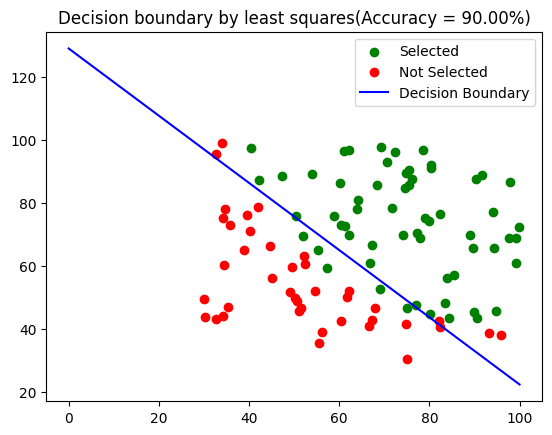

In [433]:
def calcSqError(X, Y, weights):
    return np.sum((X @ weights - Y)**2)
def getAccuracy(X, Y, weights):
    return 100*np.sum(np.sign(X @ weights) == Y)/len(Y)

''' Classification by least squares'''
X = np.array([np.array([1, x[0], x[1]]) for x,y in data])
Y = np.array([y for x,y in data])
for i in range(len(Y)):
    if Y[i] == 0:
        Y[i] = -1
weights = np.linalg.pinv(X) @ Y
plt.scatter([x[0] for x in success], [x[1] for x in success], c='g', label='Selected')
plt.scatter([x[0] for x in failure], [x[1] for x in failure], c='r', label='Not Selected')
x1 = np.linspace(0, 100, 100)
x2 = -(weights[0] + weights[1]*x1)/weights[2]
plt.plot(x1, x2, c='b', label='Decision Boundary')
plt.legend()
plt.title("Decision boundary by least squares(Accuracy = {:.2f}%)".format(getAccuracy(X, Y, weights)))
plt.show()

In [434]:
'''Sampling 80% of the dataset'''
def splitData(data, ratio):
    trainData = []
    testData = []
    for i in data:
        if random.random() <= ratio:
            trainData.append(i)
        else:
            testData.append(i)
    return trainData, testData


In [435]:
''' Implementing logistic regressor by gradient descent on the sampled data'''
def logisticRegressor(X, Y, alpha, maxIter):
    weights = np.zeros(X.shape[1])
    for i in range(maxIter):
        weights = weights - alpha * (X.T @ (1/(1+np.exp(-X @ weights)) - Y))
    return weights
def predict(X, weights):
    return 1/(1+np.exp(-X @ weights))
def calcAccuracy(X, Y, weights):
    return 100*np.sum((predict(X, weights) >= 0.5) == Y)/len(Y)

Mean Test Accuracy:  85.21325051759834 %


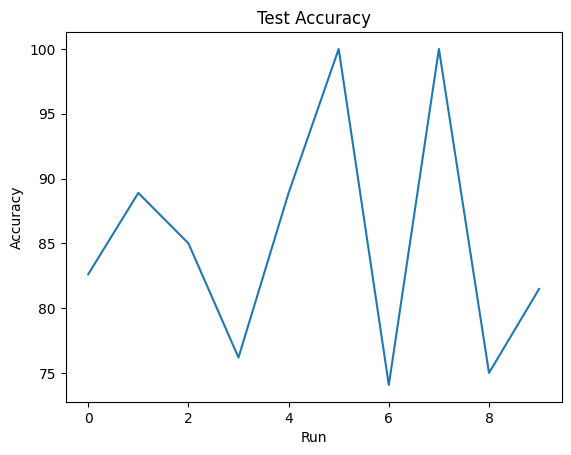

Mean Train Accuracy:  85.26592400491388 %


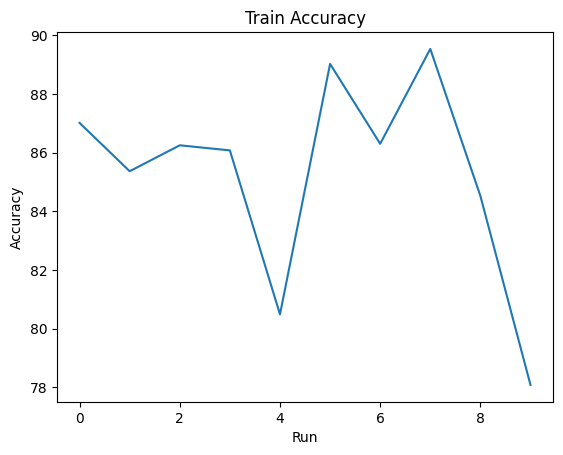

In [436]:
''' Calling the functions'''

BETA = 0.00001
NUM_RUNS = 10
testAccuracy = []
trainAccuracy = []
meanTestAccuracy = 0
meanTrainAccuracy = 0
for i in range(NUM_RUNS):
    trainData, testData = splitData(data, 0.8)
    X = np.array([np.array([1, x[0], x[1]]) for x,y in trainData])
    Y = np.array([y for x,y in trainData])
    Test_X = np.array([np.array([1, x[0], x[1]]) for x,y in testData])
    Test_Y = np.array([y for x,y in testData])
    weights = logisticRegressor(X, Y, BETA, maxIter=100000)
    testAccuracy.append(calcAccuracy(Test_X, Test_Y, weights))
    trainAccuracy.append(calcAccuracy(X, Y, weights))
    meanTestAccuracy += testAccuracy[i]
    meanTrainAccuracy += trainAccuracy[i]
meanTestAccuracy /= NUM_RUNS
meanTrainAccuracy /= NUM_RUNS
plt.plot(range(NUM_RUNS), testAccuracy)
plt.ylabel('Accuracy')
plt.xlabel('Run')
plt.title('Test Accuracy(Average: {:.2f}%)'.format(meanTestAccuracy))
plt.show()
plt.plot(range(NUM_RUNS), trainAccuracy)
plt.xlabel('Run')
plt.ylabel('Accuracy')
plt.title('Train Accuracy(Average: {:.2f}%)'.format(meanTrainAccuracy))
plt.show()

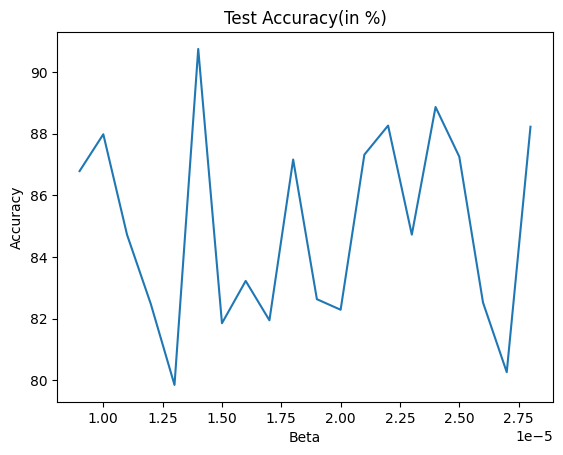

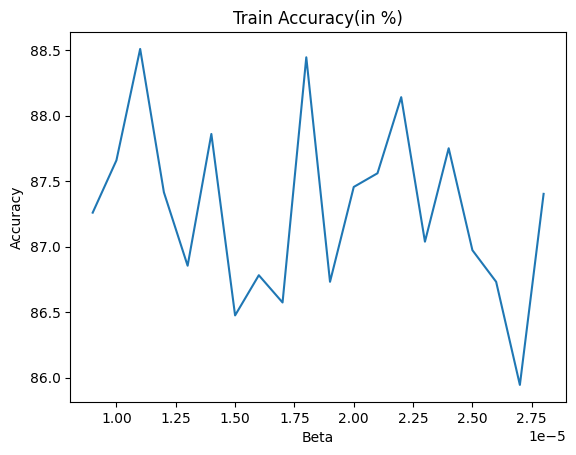

In [437]:
''' Accuracy on different values of beta'''
NUM_RUNS = 10
betaList = [pow(10,-5)+pow(10,-6)*(i-1) for i in range(20)]
testAccuracy = []
trainAccuracy = []
bestAccuracy = 0
bestWeights = np.array([])
for beta in betaList:
    meanTestAccuracy = 0
    meanTrainAccuracy = 0
    for i in range(NUM_RUNS):
        trainData, testData = splitData(data, 0.8)
        X = np.array([np.array([1, x[0], x[1]]) for x,y in trainData])
        Y = np.array([y for x,y in trainData])
        Test_X = np.array([np.array([1, x[0], x[1]]) for x,y in testData])
        Test_Y = np.array([y for x,y in testData])
        weights = logisticRegressor(X, Y, BETA, maxIter=100000)
        meanTestAccuracy += calcAccuracy(Test_X, Test_Y, weights)
        meanTrainAccuracy += calcAccuracy(X, Y, weights)
    meanTestAccuracy /= NUM_RUNS
    meanTrainAccuracy /= NUM_RUNS
    testAccuracy.append(meanTestAccuracy)
    trainAccuracy.append(meanTrainAccuracy)
    if bestAccuracy < meanTestAccuracy:
        bestAccuracy = meanTestAccuracy
        bestWeights = weights
plt.plot(betaList, testAccuracy)
plt.ylabel('Accuracy')
plt.xlabel('Beta')
plt.title('Test Accuracy(in %)')
plt.show()
plt.plot(betaList, trainAccuracy)
plt.xlabel('Beta')
plt.ylabel('Accuracy')
plt.title('Train Accuracy(in %)')
plt.show()
        

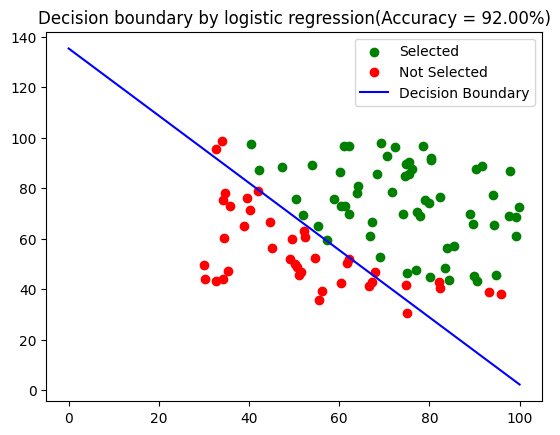

In [438]:
'''Plotting the decision boundary for the best logistic regressor'''
X = np.array([np.array([1, x[0], x[1]]) for x,y in data])
Y = np.array([y for x,y in data])
weights = bestWeights
plt.scatter([x[0] for x in success], [x[1] for x in success], c='g', label='Selected')
plt.scatter([x[0] for x in failure], [x[1] for x in failure], c='r', label='Not Selected')
x1 = np.linspace(0, 100, 100)
x2 = -(weights[0] + weights[1]*x1)/weights[2]
plt.plot(x1, x2, c='b', label='Decision Boundary')
plt.legend()
plt.title("Decision boundary by logistic regression(Accuracy = {:.2f}%)".format(calcAccuracy(X, Y, weights)))
plt.show()

**TASK 2**: Classification (Continued)                        **(14 Marks)**

Now lets change the dataset and load classification_data2.txt 

1. Plot the dataset with color coding as in previous task. (2 Marks)

2. Implement regularized (ridge regression) based logistic regressor using gradient descent. Additionally since the data is non-linear we will map the input to a $28$ dimensional vector given by $[1, x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, \ldots, x_1 x_2^5, x_2^6]$. (6 Marks)

Now we can manage to prevent overfitting in high dimension using regularizaiton. So for different regularization parameter say $\lambda$ plot non linear decision boundaries. Can you identify cases of underfitting, or overfitting? Report the observations in separate report.  (4 + 2 Marks)

**NOTE**: To plot non-linear boundary you can try to find the output of classifier on evenly spaced grid and than draw the contor plot wherever output changes from say shortlisted to not shortlisted. 


Write your code by creating cells below.


In [439]:
#write your code here You can create more cells

In [440]:
#write your code here You can create more cells

**TASK 3**: SVM                         **(25 Marks)**

Now lets change the dataset and load SVM_data1.csv 

1. Load the dataset from file - SVM_data1.csv and Plot the dataset with color coding as in previous task. (2 Marks)

2. Implement a SVM classifier. Try to find the optimal penalty (or regularization) parameter $C$. Plot the decision boundary for optimal classifier. Also plot the number of violated points (misclassified points) and number of support vectors on Y axis against different $C$ values on X-axis. Report your observations. (2 + 2 + 2 + 3 + 2 + 2 Marks)

3. Load the dataset from file - SVM_data2.csv Try to fit a non linear SVM say polynomial kernel (degree=$2$) and RBF kernel.  Compare the results for both classifier. Does RBF leads to overfitting? Plot the decision boundary for optimal classifier in both kernels. (1+2+2+3+2+2 Marks)
 

Write your code by creating cells below.


**NOTE**: Sample decision boundary plot (can be of either type or any new creative solutions are also welcomed:
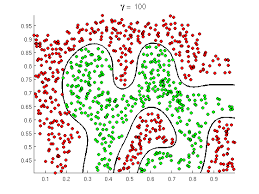
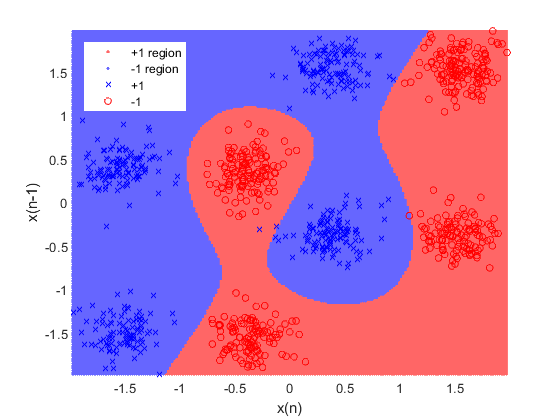


In [441]:
#write your code here You can create more cells

In [442]:
#write your code here You can create more cells

**TASK 4**: PCA and Decision Tree                       **(24 Marks)**

Now lets change the dataset and load dataset given below. 

The dataset we used in the previous section had just two numeric attributes. In this section we will look at a slightly sophisticated dataset having a mix of numeric and categorical attributes describing an adult. The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/adult. The task is to predict whether the person defined by the given set of attributes earns more than 50000 or less (Binary classification task). Implement the following and state your results with respect to this dataset.

1. Implement the decision tree algorithm to classify whether the income of a particular user exceeds \$50K per year or not. Divide the data into two sets: Training set  ($80\%$) and validation set ($20\%$). Plot the training error and validation error against the number of nodes present in the decision tree. (3 + 1 + 3 Marks)

2. Create 10 datasets using feature bagging and instance bagging technique and rerun the part 1 to find the optimal decision tree for each of these datasets. Report the final error by taking the average of each decision tree and report your findings. Did the performance improved? (You can fix number of nodes as best value obtained in previous part). (3 + 3 + 3 Marks)

3. Implement PCA to find optimal number of features. Report the error decision tree found for these optimal features against when we had all features into account.  (5+3 Marks)

Write your code by creating cells below.


In [443]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

from google.colab import drive
drive.mount('/content/MyDrive', force_remount = True)

ModuleNotFoundError: No module named 'google'

In [ ]:
#write your code here You can create more cells

In [ ]:
#Thanks 

## DO PREPARE A SEPARATE REPORT (in PDF format) for all your observations in each question. You can report any other observations as well and use your creativity to understand the concepts.